<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2 (R)
In this problem, you will work with the loans_training and loans_test datasets found here: https://github.com/bforoura/IDS/tree/main/HW6

In [15]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [17]:
# Let's read in the test data file
%%R
library(readr)
loans_test <- read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/Loans_Test.csv", show_col_types = FALSE)
loans_test

# A tibble: 49,698 × 5
   Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
   <lgl>                     <dbl>        <dbl>            <dbl>    <dbl>
 1 FALSE                         0          413             2000      900
 2 FALSE                         0          449             1000      450
 3 FALSE                         0          454             6000     2700
 4 FALSE                         0          456             1000      450
 5 FALSE                         0          457             1000      450
 6 FALSE                         0          457             8000     3600
 7 FALSE                         0          459             8000     3600
 8 FALSE                         0          461              500      225
 9 FALSE                         0          461             6000     2700
10 FALSE                         0          462            19000     8550
# … with 49,688 more rows


In [18]:
#Training data file
%%R
library(readr)
loans_training <- read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/Loans_Training.csv", show_col_types = FALSE)
loans_training

# A tibble: 150,302 × 5
   Approval `Debt-to-Income Ratio` `FICO Score` `Request Amount` Interest
   <lgl>                     <dbl>        <dbl>            <dbl>    <dbl>
 1 FALSE                         0          397             1000      450
 2 FALSE                         0          403              500      225
 3 FALSE                         0          408             1000      450
 4 FALSE                         0          408             2000      900
 5 FALSE                         0          411             5000     2250
 6 FALSE                         0          413             5000     2250
 7 FALSE                         0          416             6000     2700
 8 FALSE                         0          421             2000      900
 9 FALSE                         0          422            12000     5400
10 FALSE                         0          432            10000     4500
# … with 150,292 more rows


1. Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

In [19]:
# Classification Tree with rpart
%%R
library(rpart)

In [27]:
#rename needed columns
%%R
names(loans_training)[2] <- "Debt_to_Income_Ratio"
names(loans_training)[3] <- "FICO_Score"
names(loans_training)[4] <- "Request_Amount"

In [31]:
%%R
# Create CART model using training data that predicts Approval based on Debt-to-income Ratio, FICO score, and Request Amount
fit <- rpart(Approval ~ Debt_to_Income_Ratio + FICO_Score + Request_Amount,
      method="class",
      data=loans_training)
fit

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO_Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO_Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt_to_Income_Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt_to_Income_Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *


In [30]:
%%R
# Description of splits
summary(fit)

Call:
rpart(formula = Approval ~ Debt_to_Income_Ratio + FICO_Score + 
    Request_Amount, data = loans_training, method = "class")
  n= 150302 

         CP nsplit rel error    xerror        xstd
1 0.5646498      0 1.0000000 1.0076599 0.002582259
2 0.1267551      1 0.4353502 0.4353502 0.002130393
3 0.0100000      2 0.3085951 0.3094610 0.001866912

Variable importance
          FICO_Score Debt_to_Income_Ratio 
                  74                   25 

Node number 1: 150302 observations,    complexity param=0.5646498
  predicted class=TRUE   expected loss=0.4994345  P(node) =1
    class counts: 75066 75236
   probabilities: 0.499 0.501 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO_Score           < 659.5 to the left,  improve=28208.770, (0 missing)
      Debt_to_Income_Ratio < 0.305 to the right, improve= 8986.886, (0 missing)
      Request_Amount       < 25500 to the right, improve= 1191.854, (0 missing)
  Surrogate splits:
      Request_Amount       

2. Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [32]:
%%R
install.packages("modeldata")
install.packages("C50")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/modeldata_0.1.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 4980309 bytes (4.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [33]:
#C5.0 model with same predictors and target, with a minimum of 1000 cases per terminal node
%%R
library(modeldata)
library(C50)

In [40]:
%%R
# Create vector for predictors
vars <- c("Debt_to_Income_Ratio", "FICO_Score", "Request_Amount")
str(loans_training[, c(vars, "Approval")])

tibble [150,302 × 4] (S3: tbl_df/tbl/data.frame)
 $ Debt_to_Income_Ratio: num [1:150302] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:150302] 397 403 408 408 411 413 416 421 422 432 ...
 $ Request_Amount      : num [1:150302] 1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Approval            : logi [1:150302] FALSE FALSE FALSE FALSE FALSE FALSE ...


In [41]:
%%R
loans_training$Approval <- as.factor(loans_training$Approval)

In [42]:
# Create model, specify 1000 minimum cases
%%R
tree_mod <- C5.0(x = loans_training[, vars], y = loans_training$Approval, control = C5.0Control(minCases = 1000))


Call:
C5.0.default(x = loans_training[, vars], y = loans_training$Approval, control
 = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 3 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000



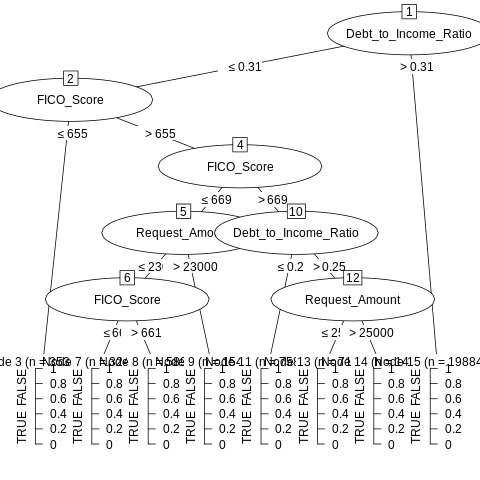

In [43]:
# Visualize C5.0 model
%%R
plot(tree_mod)
tree_mod

In [44]:
# Summary
%%R
summary(tree_mod)


Call:
C5.0.default(x = loans_training[, vars], y = loans_training$Approval, control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Fri May  6 22:23:23 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (4 attributes) from undefined.data

Decision tree:

Debt_to_Income_Ratio > 0.31: FALSE (19884/1160)
Debt_to_Income_Ratio <= 0.31:
:...FICO_Score <= 655: FALSE (35346/894)
    FICO_Score > 655:
    :...FICO_Score <= 669:
        :...Request_Amount > 23000: FALSE (1547/529)
        :   Request_Amount <= 23000:
        :   :...FICO_Score <= 661: FALSE (3246/1418)
        :       FICO_Score > 661: TRUE (5892/2056)
        FICO_Score > 669:
        :...Debt_to_Income_Ratio <= 0.25: TRUE (75846/13356)
            Debt_to_Income_Ratio > 0.25:
            :...Request_Amount <= 25000: TRUE (7112/2658)
                Request_Amount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  -

3. How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

The C5.0 model and CART model for the loans_training data both clearly show the distinct leaf nodes coming from the root nodes. However, the CART model appears to be slightly more accurate and easier to follow than the C5.0 model.